# loading and preparing data

In [96]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
from PIL import Image
from sklearn.preprocessing import LabelEncoder

In [97]:
size_img=32

In [98]:
skin_df=pd.read_csv('HAM10000_metadata.csv')

In [99]:
le = LabelEncoder()
le.fit(skin_df['dx'])
LabelEncoder()
print(list(le.classes_))
 
skin_df['label'] = le.transform(skin_df["dx"]) 
print(skin_df.sample(10))

['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']
        lesion_id      image_id     dx    dx_type   age     sex  \
7118  HAM_0006516  ISIC_0033315     nv      histo  35.0  female   
8885  HAM_0003958  ISIC_0029554     nv      histo  40.0    male   
7557  HAM_0007415  ISIC_0032515     nv      histo  35.0  female   
1107  HAM_0007051  ISIC_0031002     df      histo  65.0    male   
9707  HAM_0005931  ISIC_0031191  akiec      histo  60.0    male   
2635  HAM_0004536  ISIC_0030314    bcc      histo  40.0  female   
1808  HAM_0006540  ISIC_0033344    mel      histo  70.0  female   
4978  HAM_0002857  ISIC_0024528     nv  follow_up  25.0  female   
8738  HAM_0001764  ISIC_0032251     nv      histo  40.0  female   
1314  HAM_0006908  ISIC_0032450    mel      histo  70.0    male   

         localization  label  
7118            trunk      5  
8885            chest      5  
7557  lower extremity      5  
1107  upper extremity      3  
9707  lower extremity      0  
2635             back    

In [100]:
from sklearn.utils import resample

In [101]:
print(skin_df['label'].value_counts())

5    6705
4    1113
2    1099
1     514
0     327
6     142
3     115
Name: label, dtype: int64


In [102]:
df_0 = skin_df[skin_df['label'] == 0]
df_1 = skin_df[skin_df['label'] == 1]
df_2 = skin_df[skin_df['label'] == 2]
df_3 = skin_df[skin_df['label'] == 3]
df_4 = skin_df[skin_df['label'] == 4]
df_5 = skin_df[skin_df['label'] == 5]
df_6 = skin_df[skin_df['label'] == 6]

In [103]:
skin_df=pd.concat([df_0, df_1,df_2, df_3,df_4, df_5, df_6])

In [104]:
print(skin_df['label'].value_counts())

5    6705
4    1113
2    1099
1     514
0     327
6     142
3     115
Name: label, dtype: int64


In [105]:
image_path = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob(os.path.join('', '*', '*.jpg'))}

In [106]:
skin_df['path'] = skin_df['image_id'].map(image_path.get)

In [107]:
skin_df['image'] = skin_df['path'].map(lambda x: np.asarray(Image.open(x).resize((size_img,size_img))))

In [108]:
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split

In [127]:
X = np.asarray(skin_df['image'].tolist())
X = X/255
Y=skin_df['label']
Y_cat = to_categorical(Y, num_classes=7)
x_train, x_test, y_train, y_test = train_test_split(X, Y_cat, test_size=0.25, random_state=42)

In [110]:
df_0_balanced = resample(df_0, replace=True, n_samples=n_samples, random_state=42) 
df_1_balanced = resample(df_1, replace=True, n_samples=n_samples, random_state=42) 
df_2_balanced = resample(df_2, replace=True, n_samples=n_samples, random_state=42)
df_3_balanced = resample(df_3, replace=True, n_samples=n_samples, random_state=42)
df_4_balanced = resample(df_4, replace=True, n_samples=n_samples, random_state=42)
df_5_balanced = resample(df_5, replace=True, n_samples=n_samples, random_state=42)
df_6_balanced = resample(df_6, replace=True, n_samples=n_samples, random_state=42)

In [111]:
skin_df_balanced = pd.concat([df_0_balanced, df_1_balanced, 
                              df_2_balanced, df_3_balanced, 
                              df_4_balanced, df_5_balanced, df_6_balanced])

In [112]:
print(skin_df_balanced['label'].value_counts())

0    2000
1    2000
2    2000
3    2000
4    2000
5    2000
6    2000
Name: label, dtype: int64


In [113]:
image_path = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob(os.path.join('', '*', '*.jpg'))}

In [114]:
skin_df_balanced['path'] = skin_df['image_id'].map(image_path.get)

In [115]:
skin_df_balanced['image'] = skin_df_balanced['path'].map(lambda x: np.asarray(Image.open(x).resize((size_img,size_img))))

In [128]:
X = np.asarray(skin_df_balanced['image'].tolist())
X = X/255
Y=skin_df_balanced['label']
Y_cat = to_categorical(Y, num_classes=7)
x_train=X
y_train=Y_cat

In [117]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,AveragePooling2D

In [118]:
del model

In [120]:
model = Sequential()
model.add(Conv2D(256, (3, 3), activation="relu", input_shape=(size_img, size_img, 3)))
#model.add(MaxPool2D(pool_size=(2, 2))) 
#model.add(AveragePooling2D(pool_size=(2, 2))) 
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3),activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2))) 
#model.add(AveragePooling2D(pool_size=(2, 2))) 
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3),activation='relu'))
#model.add(AveragePooling2D(pool_size=(2, 2))) 
model.add(MaxPool2D(pool_size=(2, 2)))  
model.add(Dropout(0.3))
model.add(Flatten())

model.add(Dense(32))
model.add(Dense(7, activation='softmax'))
model.summary()


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 30, 30, 256)       7168      
_________________________________________________________________
average_pooling2d (AveragePo (None, 15, 15, 256)       0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 15, 15, 256)       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 13, 13, 128)       295040    
_________________________________________________________________
average_pooling2d_1 (Average (None, 6, 6, 128)         0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 4, 4, 64)         

In [121]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['acc'])

In [122]:
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size = 16,
    validation_data=(x_test, y_test))

Epoch 1/10
875/875 [==============================] - 37s 42ms/step - loss: 1.6654 - acc: 0.3140 - val_loss: 1.3480 - val_acc: 0.4133
Epoch 2/10
875/875 [==============================] - 48s 55ms/step - loss: 1.3566 - acc: 0.4606 - val_loss: 1.3093 - val_acc: 0.4960
Epoch 3/10
875/875 [==============================] - 51s 58ms/step - loss: 1.2534 - acc: 0.5024 - val_loss: 1.3296 - val_acc: 0.4932
Epoch 4/10
875/875 [==============================] - 51s 58ms/step - loss: 1.1914 - acc: 0.5312 - val_loss: 1.1284 - val_acc: 0.5543
Epoch 5/10
875/875 [==============================] - 51s 58ms/step - loss: 1.1280 - acc: 0.5571 - val_loss: 0.9775 - val_acc: 0.6062
Epoch 6/10
875/875 [==============================] - 51s 59ms/step - loss: 1.0641 - acc: 0.5901 - val_loss: 1.0341 - val_acc: 0.5667
Epoch 7/10
875/875 [==============================] - 51s 58ms/step - loss: 1.0032 - acc: 0.6131 - val_loss: 0.8785 - val_acc: 0.6330
Epoch 8/10
875/875 [==============================] - 51s 58ms

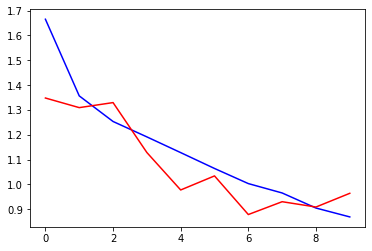

In [123]:
plt.plot(history.history['loss'],'b-')
plt.plot(history.history['val_loss'],'r-')
plt.show()

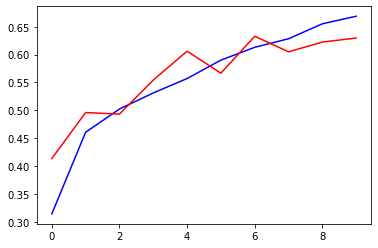

In [124]:
plt.plot(history.history['acc'],'b-')
plt.plot(history.history['val_acc'],'r-')
plt.show()

In [125]:
max(history.history['val_acc'])

0.6329872012138367

In [126]:
max(history.history['acc'])

0.6689285635948181

In [65]:
import tensorflow as tf
from tensorflow.math import confusion_matrix 

In [66]:
u=model.predict(x_test)
index = np.argmax(u, axis=-1)
y=np.argmax(y_test, axis=-1)

In [67]:
cm=tf.math.confusion_matrix(y,index)
cm

<tf.Tensor: shape=(7, 7), dtype=int32, numpy=
array([[  85,    1,    0,    0,    0,    0,    0],
       [   9,  129,    1,    2,    0,    0,    1],
       [  48,   27,  164,    7,   20,   10,    2],
       [   0,    0,    0,   23,    0,    0,    0],
       [  25,    6,   30,    1,  206,   15,    2],
       [  73,   73,  115,   15,  286, 1077,   10],
       [   0,    0,    0,    0,    0,    0,   41]])>

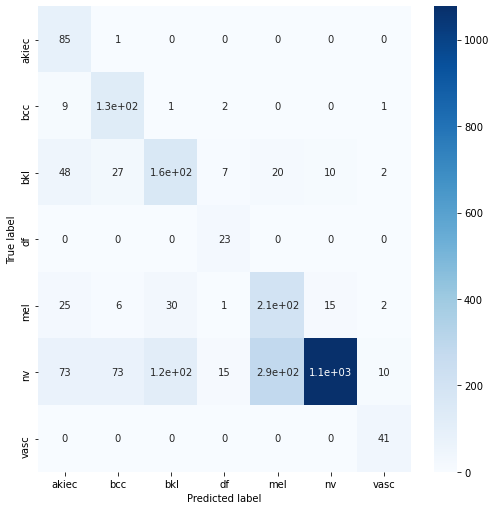

In [68]:
import seaborn as sns
labels=['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']
figure = plt.figure(figsize=(7, 7))
sns.heatmap(cm, annot=True,cmap=plt.cm.Blues, xticklabels=labels, yticklabels=labels)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [69]:
colums=np.sum(cm,axis=0)

rows=np.sum(cm,axis=1)

tp=np.array([cm[0][0],cm[1][1],cm[2][2],cm[3][3],cm[4][4],cm[5][5],cm[6][6]])


recalls=tp/colums
precisions=tp/rows

In [70]:
recalls

array([0.35416667, 0.54661017, 0.52903226, 0.47916667, 0.40234375,
       0.97731397, 0.73214286])

In [71]:
precisions

array([0.98837209, 0.9084507 , 0.58992806, 1.        , 0.72280702,
       0.6531231 , 1.        ])

In [72]:
f1=(2*(recalls*precisions))/(recalls+precisions)
f1

array([0.52147239, 0.68253968, 0.55782313, 0.64788732, 0.51693852,
       0.782988  , 0.84536082])